In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

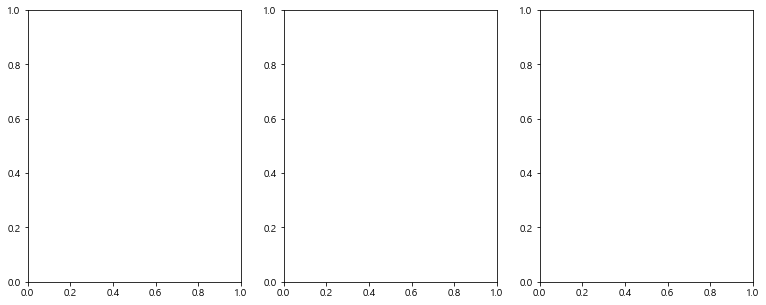

In [13]:
fig, axes = plt.subplots(1, 3 , figsize=(13,5))

param_grid_linear = {"C" : np.linspace(1,2,6), "gamma" : np.linspace(1,2,6)} 
# C,gamma value array 로 만든 dictionary
#type(param_grid_linear)
param_grid_one_log = {"C" : np.linspace(1,2,6), "gamma":np.logspace(-3,2,6)}
# 1.0 e-3, ..., 1.0 e+2 
param_grid_range = {"C" : np.logspace(-3,2,6), "gamma":np.logspace(-7,2,6)}

In [14]:
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.svm import SVC

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
#dataset 마련

In [25]:
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(),param_grid, cv=5)
    grid_search.fit(X_train,y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    

[[0.94664032 0.94664032 0.94664032 0.94664032 0.94664032 0.95533597]
 [0.95533597 0.94664032 0.94664032 0.94664032 0.94664032 0.95533597]
 [0.95533597 0.95533597 0.94664032 0.94664032 0.94664032 0.94664032]
 [0.95533597 0.95533597 0.95533597 0.94664032 0.94664032 0.94664032]
 [0.95533597 0.95533597 0.95533597 0.94664032 0.94664032 0.94664032]
 [0.95533597 0.95533597 0.95533597 0.94664032 0.94664032 0.94664032]]
[[0.69644269 0.93794466 0.96403162 0.94664032 0.9284585  0.50158103]
 [0.69644269 0.93794466 0.96403162 0.95533597 0.91976285 0.58142292]
 [0.69644269 0.93794466 0.96403162 0.95533597 0.91976285 0.58142292]
 [0.69644269 0.94664032 0.96403162 0.95533597 0.91106719 0.58142292]
 [0.69644269 0.94664032 0.96403162 0.95533597 0.91106719 0.58142292]
 [0.69644269 0.94664032 0.96403162 0.95533597 0.91106719 0.58142292]]
[[0.36640316 0.36640316 0.36640316 0.36640316 0.36640316 0.36640316]
 [0.36640316 0.36640316 0.36640316 0.36640316 0.36640316 0.36640316]
 [0.36640316 0.36640316 0.366403